# SciPy tutorial

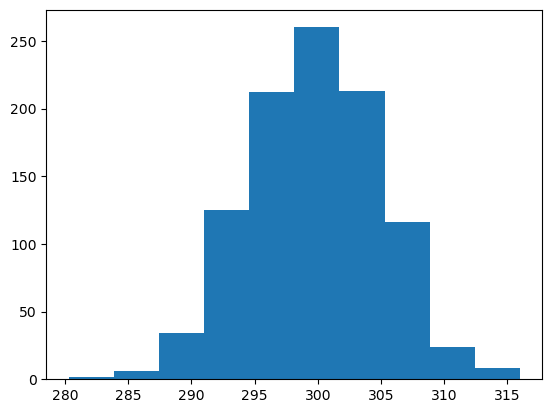

In [1]:
# 정규성 검정
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()

In [2]:
from scipy import stats
print(dir(stats))

['BootstrapMethod', 'CensoredData', 'ConstantInputWarning', 'Covariance', 'DegenerateDataWarning', 'FitError', 'MonteCarloMethod', 'NearConstantInputWarning', 'PermutationMethod', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_ansari_swilk_statistics', '_axis_nan_policy', '_biasedurn', '_binned_statistic', '_binomtest', '_boost', '_bws_test', '_censored_data', '_common', '_constants', '_continuous_distns', '_covariance', '_crosstab', '_discrete_distns', '_distn_infrastructure', '_distr_params', '_entropy', '_fit', '_hypotests', '_kde', '_ksstats', '_levy_stable', '_mannwhitneyu', '_morestats', '_mstats_basic', '_mstats_extras', '_multicomp', '_multivariate', '_mvn', '_odds_ratio', '_page_trend_test', '_qmc', '_qmc_cy', '_qmvnt', '_rcont', '_relative_risk', '_resampling', '_rvs_sampling', '_sampling', '_sensitivity_analysis', '_sobol', '_stats', '_stats_mstats_common', '_stats_py', '_stats_pythran', '_su

In [3]:
# 정규성 검정
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9981433805517022, pvalue=0.34796592330595577)


-> 샤피로 검정 시, p-value=0.35 -> 유의수준 5%에서 귀무가설 기각 불가
=> 귀무가설 채택. 정규성을 가진다.<br>
<br>
p-value가 유의수준보다 크면, 유의하므로 귀무가설 기각할 수 없음 -> 귀무가설 채택<br>
p-value < 유의수준이면, 유의하지 않으므로, 귀무가설 기각 -> 대립가설 채택

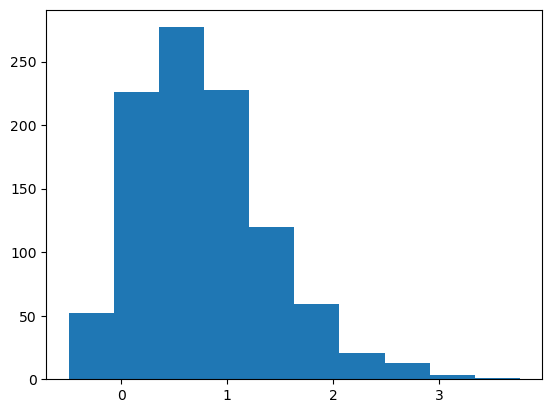

In [4]:
# 2
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [5]:
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9578887230674161, pvalue=2.3098528601775786e-16)


**p-value = 2.3e-16** (아주 작은수...)
-> p-value < 0.05 : 유의수준 5%에서 귀무가설 기각 가능, 대립가설 채택<br>
=> 데이터는 정규성을 가지지 않는다.

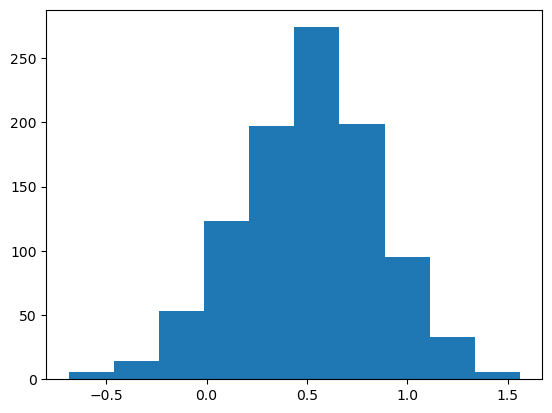

In [6]:
# 3 log 변환 후 정규성 가지는 지 확인
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
log_y_data = np.log1p(df)  # 로그변환!!!!!!
plt.hist(log_y_data)
plt.show()

In [8]:
from scipy.stats import shapiro
print(shapiro(log_y_data))

ShapiroResult(statistic=0.9976879570377135, pvalue=0.17513126966872208)


로그변환 한 데이터 -> p-value > 0.05 귀무가설 기각불가. 귀무가설 채택 <br>
=> 정규성을 가진다.

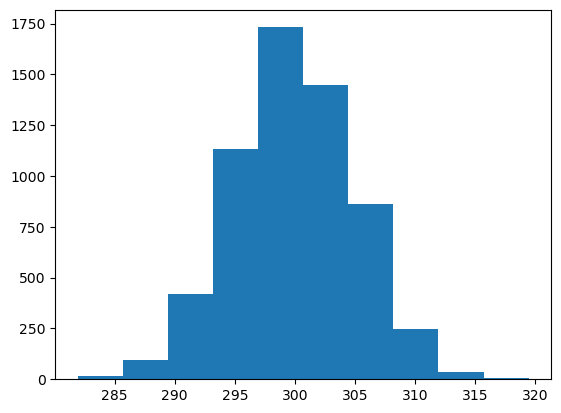

In [9]:
# 7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [10]:
from scipy.stats import shapiro

print(shapiro(df))

ShapiroResult(statistic=0.9995353804150279, pvalue=0.15046155392344363)


/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6000.
  res = hypotest_fun_out(*samples, **kwds)


shapiro 검정 시, p-value > 0.05 이므로 귀무가설 유의함. 귀무가설 기각 불가. 귀무가설 채택<br>
**경고메세지**
5000개 초과의 샘플에 대해서 샤피로 검정은 정확하지 않을 수 o <br>
=> anderson 검정

In [12]:
# anderson 검정(N > 5000)
from scipy.stats import anderson
print(anderson(df['data'].values))

AndersonResult(statistic=0.8266993530396576, critical_values=array([0.576, 0.656, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=299.95980319533163, scale=5.03180688788513)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


### anderson 검정 결과 해석
significance_level : 유의 확률값
critical_values : 각 유의확률 값의 기준점
- 유의수준 5%에서 검정 진행 -> significance_level 5.에서 확인 => critical_values= 0.786
- statistic = 0.82
- **p-value로 판단할 때와 반대..**
- 0.82 > 0.786 (statistic > critical_values) => 귀무가설 기각. 대립가설 채택
=> 정규성을 가지지 않는다.

# 단일 표본 t-검정(one-sample)

100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

1. 데이터가 정규성을 만족하는지 확인
2. 정규성을 만족하는 경우
   - 평균 165인지 검정 : 단일 표본 t-검정

3. 정규성을 만족하지 않는 경우
   - 평균 165인지 검정: 윌콕슨 부호순위 검정(비모수)
   - 샘플이 정규분포를 따르지 않으므로,
   - 평균이 아닌 중앙값 기준의 검정 수행
   - df['height'] - 165 형태로 중심값을 기준으로 편차의 부호/순위 계산

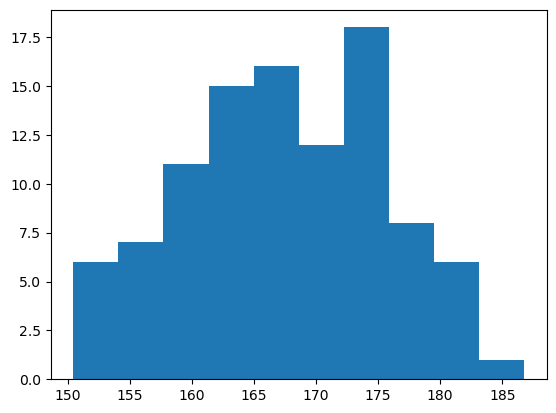

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')
plt.hist(df)
plt.show()

In [14]:
from scipy.stats import shapiro
print(shapiro(df))

ShapiroResult(statistic=0.9872671038154957, pvalue=0.45583339816328994)


p-value > 0.05 이므로 귀무가설 유의. 기각불가. 정규성을 만족한다.

In [15]:
# 평균키 = 165라 할 수 있는지 귀무가설, 대립가설 설정 후 유의수준 5% 검정
# H0: m = 165 , H1: m != 165

from scipy.stats import ttest_1samp, shapiro, wilcoxon
# 데이터의 정규성 먼저 검정
static, pvalue = shapiro(df)
print('샤피로 정규성 검정 p-value: ', pvalue,'이므로')

# 데이터가 정규성을 만족하지 않는 경우
if pvalue < 0.05 : 
    print('귀무가설 기각. 정규성 만족하지 않으므로 비모수 검정 진행. 윌콕슨 순위 부호 검정 진행')

    # 윌콕슨 부호순위 검정
    static, pvalue = wilcoxon(df['height']-165)
    # static, pvalue = wilcoxon(df['height'], np.ones(len(df) * 165) # 여러 표본쌍을 비교할 때 일반적인 형식

    if pvalue < 0.05:
        print(f'검정결과 pvalue 는 {pvalue}이므로 귀무가설 기각. 평균은 165가 아니다')
    else:
        print('평균은 165')

# 데이터가 정규성을 만족하는 경우 -> t-검정
else:
    # 단일 표본 t검정
    static, pvalue = ttest_1samp(df['height'], 165)
    if pvalue < 0.05:
        print('귀무가설 기각')
    else:
        print('귀무가설 채택')
    

샤피로 정규성 검정 p-value:  0.45583339816328994 이므로
귀무가설 기각
